### Me Looking at the Model Features (also for investigating layers)

In [1]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from mobilenet_v3 import MobileNetV3

In [2]:
model = MobileNetV3(n_class=200, input_size=32)

In [3]:
help(model)

Help on MobileNetV3 in module mobilenet_v3 object:

class MobileNetV3(torch.nn.modules.module.Module)
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  Method resolution order:
 |      MobileNetV3
 |      torch.nn.modules.module.Modul

In [4]:
model.features[14].bias

Parameter containing:
tensor([0., 0., 0.,  ..., 0., 0., 0.], requires_grad=True)

In [5]:
model.features

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Hswish()
  )
  (1): MobileBottleneck(
    (conv): Sequential(
      (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): SEModule(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=16, out_features=4, bias=False)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=16, bias=False)
          (3): Hsigmoid()
        )
      )
      (6): ReLU(inplace=True

In [14]:
model.named_parameters()

<generator object Module.named_parameters at 0x0000020F8B6B3DB0>

In [23]:
for x in model.named_parameters():
    print(x)

('features.0.0.weight', Parameter containing:
tensor([[[[ 2.9301e-02, -9.8357e-02, -5.8738e-02],
          [ 4.4233e-02, -1.2989e-01,  2.6824e-01],
          [-7.4594e-02,  3.3319e-02, -9.6873e-02]],

         [[ 1.2393e-02, -4.4678e-02,  2.0089e-01],
          [-2.7707e-01, -1.7870e-02,  8.3216e-02],
          [ 3.5573e-02,  5.1634e-02, -5.6228e-02]],

         [[-2.7073e-03, -1.2383e-01, -1.8989e-01],
          [ 8.1294e-02, -2.1419e-01,  1.7086e-01],
          [-1.8902e-01, -7.0541e-02, -1.5845e-01]]],


        [[[-7.5371e-02, -2.8984e-02, -1.2668e-01],
          [ 8.8808e-02, -4.5659e-02, -7.3812e-03],
          [ 6.1884e-04, -5.6829e-02, -5.0865e-02]],

         [[-8.0903e-02,  7.7929e-02,  2.9573e-01],
          [-5.5195e-02, -1.3692e-02, -3.5968e-02],
          [-1.5444e-01,  2.5827e-01,  6.5936e-02]],

         [[ 4.2589e-02, -6.2481e-02, -1.7567e-01],
          [ 1.9979e-01,  1.9205e-02,  7.8636e-02],
          [ 4.1861e-02, -6.9794e-02,  1.8159e-02]]],


        [[[-1.4591e-

         [[ 0.5854]]]], requires_grad=True))
('features.1.conv.1.weight', Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True))
('features.1.conv.1.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True))
('features.1.conv.3.weight', Parameter containing:
tensor([[[[ 0.0220, -0.0119,  0.0645],
          [-0.2035,  0.0130, -0.1746],
          [-0.0232,  0.1081,  0.0560]]],


        [[[ 0.0080, -0.1044, -0.0655],
          [ 0.0424,  0.3476,  0.0542],
          [-0.0065, -0.0147,  0.0434]]],


        [[[ 0.0475,  0.1159,  0.0671],
          [-0.0005, -0.2071, -0.1955],
          [ 0.1043,  0.1108,  0.0814]]],


        [[[-0.1778, -0.0558,  0.0613],
          [ 0.1198, -0.0083,  0.1221],
          [-0.1138, -0.0839, -0.0791]]],


        [[[ 0.0892, -0.1596, -0.0854],
          [-0.0654, -0.1480,  0.1997],
          [-0.0615,  0.0774,  0.0369]]],

         [[ 0.5893]]]], requires_grad=True))
('features.1.conv.8.weight', Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True))
('features.1.conv.8.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True))
('features.2.conv.0.weight', Parameter containing:
tensor([[[[ 0.0878]],

         [[ 0.0755]],

         [[-0.1898]],

         ...,

         [[-0.0092]],

         [[-0.1700]],

         [[-0.1280]]],


        [[[-0.2796]],

         [[-0.0240]],

         [[-0.0534]],

         ...,

         [[-0.2015]],

         [[ 0.1329]],

         [[ 0.1055]]],


        [[[ 0.1362]],

         [[-0.3431]],

         [[ 0.1590]],

         ...,

         [[ 0.0062]],

         [[ 0.1908]],

         [[ 0.1408]]],


        ...,


        [[[-0.1079]],

         [[-0.3540]],

         [[ 0.1129]],

         ...,

         [[ 0.0574]],

         [[-0.2

          [ 7.9173e-02, -4.3631e-02, -1.2976e-01]]]], requires_grad=True))
('features.2.conv.4.weight', Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True))
('features.2.conv.4.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True))
('features.2.conv.7.weight', Parameter containing:
tensor([[[[-0.1333]],

         [[-0.1760]],

         [[ 0.3654]],

         ...,



          [-1.6878e-03, -1.6255e-02,  6.7014e-03]]]], requires_grad=True))
('features.3.conv.4.weight', Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True))
('features.3.conv.4.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_gra

       requires_grad=True))
('features.4.conv.5.fc.2.weight', Parameter containing:
tensor([[ 0.0057, -0.0229,  0.0115,  ...,  0.0023,  0.0105, -0.0082],
        [-0.0011, -0.0116, -0.0025,  ..., -0.0033, -0.0066, -0.0035],
        [-0.0012,  0.0097,  0.0007,  ..., -0.0156,  0.0040, -0.0043],
        ...,
        [ 0.0113,  0.0004, -0.0057,  ..., -0.0025,  0.0078, -0.0096],
        [-0.0127,  0.0181,  0.0079,  ..., -0.0033,  0.0027,  0.0019],
        [-0.0231,  0.0030, -0.0002,  ...,  0.0192,  0.0081,  0.0008]],
       requires_grad=True))
('features.4.conv.7.weight', Parameter containing:
tensor([[[[-0.3161]],

         [[-0.0794]],

         [[ 0.1004]],

         ...,

         [[-0.2945]],

         [[-0.2140]],

         [[ 0.0653]]],


        [[[-0.0174]],

         [[ 0.5130]],

         [[-0.3500]],

         ...,

         [[-0.2474]],

         [[ 0.1555]],

         [[ 0.0946]]],


        [[[ 0.0303]],

         [[ 0.1128]],

         [[ 0.1146]],

         ...,

         

        1., 1., 1., 1., 1., 1.], requires_grad=True))
('features.5.conv.4.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

       requires_grad=True))
('features.6.conv.4.weight', Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1

       requires_grad=True))
('features.7.conv.4.weight', Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True))
('features.7.conv.4.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
  

       requires_grad=True))
('features.8.conv.4.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True))
('features.8.conv.5.fc.0.weight', Parameter containing:
tensor([[ 0.0021, -0.0014,  0.0050,  ...,  0.0076, -0.0216, -0.0016],
        [ 0.0057, -0.0011,  0.0029,  ..., -0.0119,  0.0092, -0.0073],
        [-0.0174, -0.0128, -0.0013,  ...,  0.0019, -0.0083,  0.0069],
    

          [ 0.0095, -0.0070, -0.0153, -0.0068, -0.0019]]]], requires_grad=True))
('features.9.conv.4.weight', Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

       requires_grad=True))
('features.10.conv.1.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

       requires_grad=True))
('features.10.conv.5.fc.0.weight', Parameter containing:
tensor([[-0.0033,  0.0068,  0.0080,  ..., -0.0083, -0.0051, -0.0137],
        [-0.0089, -0.0061, -0.0009,  ..., -0.0016, -0.0120,  0.0049],
        [-0.0093, -0.0148, -0.0228,  ..., -0.0085, -0.0043,  0.0067],
        ...,
        [ 0.0019,  0.0071, -0.0141,  ...,  0.0103,  0.0086, -0.0089],
        [-0.0050,  0.0042, -0.0031,  ..., -0.0067,  0.0036, -0.0093],
        [-0.0095, -0.0068, -0.0148,  ...,  0.0055,  0.0085,  0.0119]],
       requires_grad=True))
('features.10.conv.5.fc.2.weight', Parameter containing:
tensor([[ 1.6070e-02, -4.8493e-03,  1.6137e-03,  ..., -9.3481e-03,
         -2.6021e-03,  9.1733e-03],
        [-2.3350e-02,  6.9596e-03, -1.7006e-03,  ...,  1.2949e-02,
         -9.6765e-03, -8.9649e-03],
        [ 9.7184e-03,  4.3505e-03,  3.8711e-03,  ..., -1.1226e-03,
          1.4709e-02, -9.4082e-03],
        ...,
        [-4.1899e-04, -9.9561e-03,  2.2383e-03,  ...,  1.6828e-02,
       

       requires_grad=True))
('features.11.conv.3.weight', Parameter containing:
tensor([[[[-2.0490e-02,  1.5196e-02, -4.9326e-03, -1.6522e-03, -1.4019e-02],
          [-7.6199e-03,  4.1207e-03, -7.0759e-03,  1.1320e-02,  1.3983e-02],
          [-2.0495e-02, -9.0694e-03,  2.1807e-02, -3.0034e-03, -2.3948e-04],
          [-3.7610e-06,  1.0979e-03, -6.2111e-03, -5.6571e-03, -9.2305e-03],
          [-8.6383e-03,  1.0686e-02, -8.9096e-03, -1.3061e-02, -2.0410e-03]]],


        [[[ 2.2328e-02,  1.6387e-04,  1.5624e-03, -7.9043e-03, -3.3251e-03],
          [-3.9875e-03, -6.6285e-04, -5.2713e-03,  2.2458e-03, -4.3907e-04],
          [ 6.5037e-03,  1.9969e-02,  3.7040e-04, -9.5742e-03, -1.4058e-02],
          [-1.2536e-02,  9.2934e-03,  2.3671e-02,  4.9412e-03, -1.4155e-02],
          [ 1.5455e-02,  1.2759e-03,  1.4110e-03,  1.6255e-02, -2.1020e-03]]],


        [[[ 8.5031e-04,  6.0331e-03,  1.0934e-02,  3.0287e-03, -2.5322e-03],
          [-5.8618e-03, -2.6175e-03,  1.2523e-02,  4.0511e-03,  7

       requires_grad=True))
('features.11.conv.7.weight', Parameter containing:
tensor([[[[ 0.2477]],

         [[ 0.1791]],

         [[ 0.1508]],

         ...,

         [[-0.0441]],

         [[-0.1504]],

         [[ 0.1911]]],


        [[[ 0.2460]],

         [[-0.0171]],

         [[-0.1282]],

         ...,

         [[ 0.2726]],

         [[-0.1118]],

         [[ 0.1489]]],


        [[[-0.0108]],

         [[-0.1420]],

         [[-0.3085]],

         ...,

         [[ 0.0130]],

         [[ 0.0692]],

         [[ 0.0964]]],


        ...,


        [[[-0.0879]],

         [[ 0.0729]],

         [[-0.3656]],

         ...,

         [[-0.0006]],

         [[ 0.2073]],

         [[ 0.1650]]],


        [[[-0.0696]],

         [[ 0.1326]],

         [[ 0.0756]],

         ...,

         [[ 0.0873]],

         [[ 0.1279]],

         [[-0.3080]]],


        [[[ 0.0149]],

         [[-0.2361]],

         [[ 0.0373]],

         ...,

         [[-0.0051]],

         [[-0.1901]],



       requires_grad=True))
('features.14.weight', Parameter containing:
tensor([[[[-0.0174]],

         [[-0.0624]],

         [[-0.0354]],

         ...,

         [[-0.0695]],

         [[-0.0150]],

         [[ 0.0516]]],


        [[[-0.0074]],

         [[-0.0622]],

         [[-0.0944]],

         ...,

         [[ 0.0523]],

         [[-0.0446]],

         [[-0.0721]]],


        [[[ 0.0019]],

         [[-0.0745]],

         [[ 0.0013]],

         ...,

         [[ 0.0372]],

         [[ 0.0133]],

         [[-0.0109]]],


        ...,


        [[[-0.0208]],

         [[ 0.0012]],

         [[-0.0979]],

         ...,

         [[-0.0177]],

         [[-0.0274]],

         [[-0.0285]]],


        [[[-0.0182]],

         [[ 0.0407]],

         [[-0.0202]],

         ...,

         [[-0.0416]],

         [[ 0.0203]],

         [[ 0.0245]]],


        [[[ 0.0132]],

         [[ 0.0306]],

         [[-0.0222]],

         ...,

         [[ 0.0165]],

         [[-0.0213]],

       

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from math import ceil
from sklearn.metrics import accuracy_score, log_loss
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')
from utils.input_pipeline import get_image_folders
from utils.diagnostic import top_k_accuracy, count_params,\
    entropy, model_calibration, predict

torch.cuda.is_available()

ModuleNotFoundError: No module named 'thop'

# Load the model

In [25]:
from get_mobilenet_v3 import get_model

In [ ]:
_, val_folder = get_image_folders()

In [5]:
model, _, _ = get_model()

# load pretrained quantized model
model.load_state_dict(torch.load('model_ternary_quantization.pytorch_state'))

In [6]:
# number of params in the model
count_params(model)

827784

# Show quantized kernel tensors (there are 24 such kernels overall)

In [7]:
# all quantized kernels    
all_kernels = [
    (n, p.data) for n, p in model.named_parameters()
    if ('weight' in n and not 'bn' in n and not 'features.1.' in n 
        and not 'classifier' in n and not 'features.0.' in n)
]

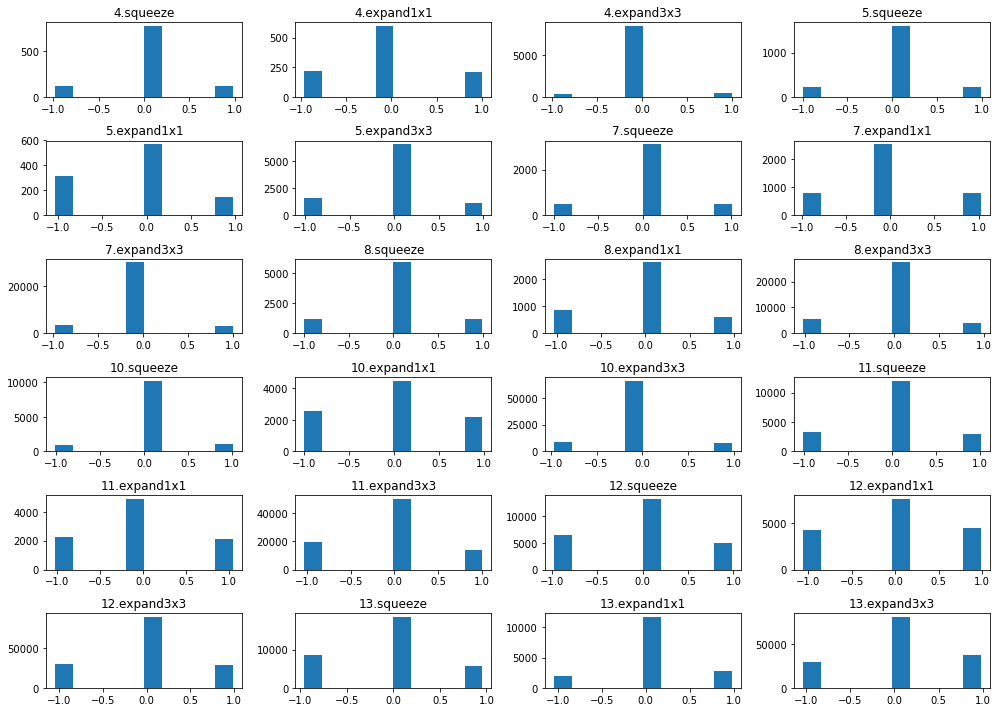

In [8]:
_, axes = plt.subplots(nrows=6, ncols=4, figsize=(14, 10))
axes = axes.flatten()
for i, (name, kernel) in enumerate(all_kernels):
    axes[i].hist(kernel.cpu().numpy().reshape(-1));
    axes[i].set_title(name[9:-7]);

plt.tight_layout()

# sparcity distribution

In [9]:
sparcity = []
for n, p in all_kernels:
    sparcity.append(p.eq(0.0).float().mean())

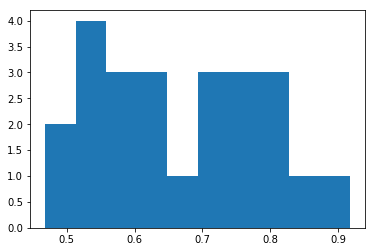

In [10]:
plt.hist(sparcity);

In [11]:
np.mean(sparcity)

0.66487083584070206

# scaling factors

In [12]:
upper_scaling_factor = []
lower_scaling_factor = []
for n, p in all_kernels:
    upper_scaling_factor.append(p.max())
    lower_scaling_factor.append(p.min())

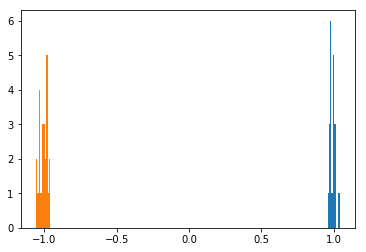

In [13]:
plt.hist(upper_scaling_factor);
plt.hist(lower_scaling_factor);

# Error analysis

### get all predictions

In [14]:
val_iterator_no_shuffle = DataLoader(
    val_folder, batch_size=64, shuffle=False
)

In [15]:
val_predictions, val_true_targets = predict(model, val_iterator_no_shuffle)

100%|██████████| 157/157 [00:10<00:00, 15.60it/s]


### logloss and accuracies

In [16]:
log_loss(val_true_targets, val_predictions)

2.8442614205883117

In [17]:
accuracy_score(val_true_targets, val_predictions.argmax(1))

0.35570000000000002

In [18]:
print(top_k_accuracy(val_true_targets, val_predictions, k=(2, 3, 4, 5, 10)))

[0.47239999999999999, 0.54449999999999998, 0.59209999999999996, 0.62770000000000004, 0.73429999999999995]


### number of misclassified images (there are overall 10000 images in the val dataset)

In [19]:
hits = val_predictions.argmax(1) == val_true_targets
(~hits).sum()

6443

### entropy of predictions

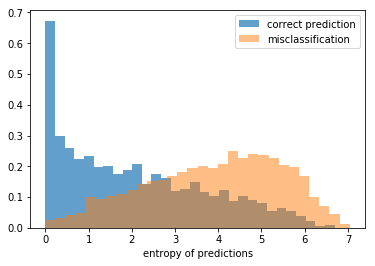

In [20]:
plt.hist(
    entropy(val_predictions[hits]), bins=30, 
    normed=True, alpha=0.7, label='correct prediction'
);
plt.hist(
    entropy(val_predictions[~hits]), bins=30, 
    normed=True, alpha=0.5, label='misclassification'
);
plt.legend();
plt.xlabel('entropy of predictions');

### confidence of predictions

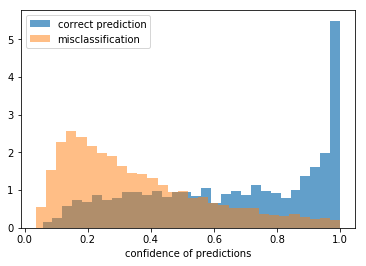

In [21]:
plt.hist(
    val_predictions[hits].max(1), bins=30, 
    normed=True, alpha=0.7, label='correct prediction'
);
plt.hist(
    val_predictions[~hits].max(1), bins=30, 
    normed=True, alpha=0.5, label='misclassification'
);
plt.legend();
plt.xlabel('confidence of predictions');

### difference between biggest and second biggest probability

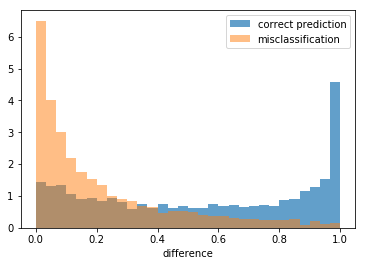

In [22]:
sorted_correct = np.sort(val_predictions[hits], 1)
sorted_incorrect = np.sort(val_predictions[~hits], 1)

plt.hist(
    sorted_correct[:, -1] - sorted_correct[:, -2], bins=30, 
    normed=True, alpha=0.7, label='correct prediction'
);
plt.hist(
    sorted_incorrect[:, -1] - sorted_incorrect[:, -2], bins=30, 
    normed=True, alpha=0.5, label='misclassification'
);
plt.legend();
plt.xlabel('difference');

### probabilistic calibration of the model

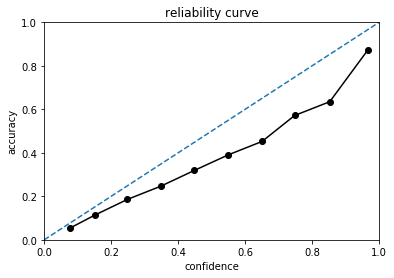

In [23]:
model_calibration(val_true_targets, val_predictions, n_bins=10)